In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [22]:
f = open("perch.dat", 'rb')
perch = pickle.load(f)
f.close()

In [23]:
length, weight = perch

In [24]:
length.shape, weight.shape

((56,), (56,))

In [25]:
length2 = length.reshape(56, 1)
length2.shape

(56, 1)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(length2, weight)

model = KNeighborsRegressor(n_neighbors=10)
model.fit(train_input, train_target)
score = model.score(test_input, test_target)
score

0.9819381892314681

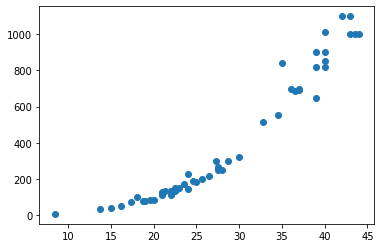

In [12]:
plt.scatter(length, weight)

In [18]:
model.predict([[60]])

array([904.])

In [28]:
# 선형 회귀을 사용해서 K최근접보다 정확도가 더 높게 나오는지 확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(test_input, test_target)

0.7853767278932813

In [30]:
lr.coef_

array([39.17449477])

In [31]:
lr.intercept_

-712.5115464822361

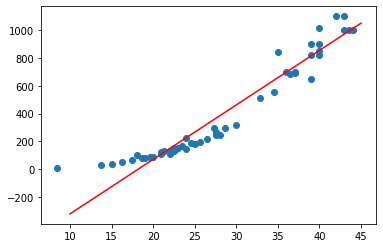

In [33]:
plt.scatter(length, weight)
plt.plot(range(10,46), lr.coef_ * range(10,46) + lr.intercept_, 'red')

In [35]:
# 특성 3개, 정답지 : weight
perch2 = pd.read_csv("perch2.csv")
del perch2['Unnamed: 0']
perch2

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [40]:
import numpy as np

data = np.array(perch2)
target = weight

train_input, test_input, train_target, test_target = train_test_split(data, target)

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

lr = LinearRegression()
lr.fit(train_scaled, train_target)

LinearRegression()

In [41]:
lr.coef_

array([ 45.29616979, 243.0567912 ,  54.78031182])

In [42]:
lr.intercept_

403.44999999999976

In [43]:
lr.score(test_scaled, test_target)

0.953257181988913

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

fish2 = pd.read_csv("fish2.csv")

data = fish2.iloc[:, 1:].to_numpy()
target = fish2['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

0.825

In [50]:
knn.predict(test_scaled)

array(['Bream', 'Perch', 'Roach', 'Pike', 'Perch', 'Bream', 'Parkki',
       'Roach', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Bream',
       'Smelt', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Bream',
       'Pike', 'Bream', 'Smelt', 'Perch', 'Smelt', 'Smelt', 'Perch',
       'Smelt', 'Perch', 'Bream', 'Pike', 'Perch', 'Perch', 'Perch',
       'Bream', 'Bream', 'Pike', 'Pike', 'Bream'], dtype=object)

In [53]:
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [52]:
# 0, 33, 66, 100
np.round(knn.predict_proba(test_scaled), 2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.33, 0.67, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.67, 0.33, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67, 0.  , 0.  ],
       [0.67, 0.33, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.  , 0.  , 0.  , 0.33],
       [1.  , 0.  , 0.  , 0.  ,

In [54]:
# 정확한 확률을 알 수 있는 모델
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_scaled, train_target)
lg.score(test_scaled, test_target)

0.875

In [55]:
lg.predict(test_scaled)

array(['Bream', 'Perch', 'Perch', 'Pike', 'Perch', 'Bream', 'Bream',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Bream',
       'Smelt', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Bream',
       'Pike', 'Bream', 'Smelt', 'Perch', 'Smelt', 'Smelt', 'Perch',
       'Smelt', 'Perch', 'Bream', 'Pike', 'Perch', 'Perch', 'Perch',
       'Bream', 'Bream', 'Pike', 'Pike', 'Bream'], dtype=object)

In [57]:
np.round(lg.predict_proba(test_scaled), 2)

array([[0.79, 0.04, 0.06, 0.01, 0.03, 0.  , 0.07],
       [0.01, 0.04, 0.66, 0.02, 0.23, 0.01, 0.03],
       [0.05, 0.05, 0.57, 0.04, 0.21, 0.  , 0.07],
       [0.01, 0.  , 0.15, 0.79, 0.03, 0.  , 0.03],
       [0.01, 0.06, 0.64, 0.02, 0.23, 0.02, 0.03],
       [0.74, 0.14, 0.03, 0.01, 0.04, 0.  , 0.04],
       [0.46, 0.33, 0.05, 0.01, 0.11, 0.  , 0.04],
       [0.01, 0.11, 0.55, 0.02, 0.26, 0.02, 0.04],
       [0.92, 0.04, 0.01, 0.  , 0.01, 0.  , 0.03],
       [0.58, 0.21, 0.05, 0.02, 0.09, 0.  , 0.05],
       [0.  , 0.08, 0.61, 0.01, 0.2 , 0.09, 0.01],
       [0.01, 0.03, 0.71, 0.03, 0.19, 0.  , 0.03],
       [0.01, 0.18, 0.36, 0.02, 0.37, 0.03, 0.03],
       [0.44, 0.26, 0.1 , 0.01, 0.12, 0.  , 0.07],
       [0.  , 0.06, 0.12, 0.  , 0.06, 0.75, 0.  ],
       [0.02, 0.13, 0.46, 0.03, 0.3 , 0.03, 0.04],
       [0.  , 0.  , 0.07, 0.91, 0.  , 0.  , 0.01],
       [0.76, 0.12, 0.02, 0.02, 0.04, 0.  , 0.04],
       [0.03, 0.05, 0.57, 0.06, 0.23, 0.  , 0.06],
       [0.87, 0.02, 0.03, 0.01,

In [ ]:
# 트리 기반 모델(85%)
# 1. 강력함(성능이 좋다.)
# 2. 데이터 표준화 X // 데이터의 설명력
# 3. 데이터의 설명력
# 4. 랜덤포레스트(데이터분할X)

# 1. 결정트리 -> (랜덤 포레스트, XgBoost)
# 스무고개 형식

In [70]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. fish2 데이터를 결정트리로 학습해보시고, 그림도 그려보세요.
# 과대적합되었는지 안되었는지도 확인

iris = load_iris()
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target)

dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

# 10.6% / 5% / 3%
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.8947368421052632


In [71]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [37, 39, 36]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'petal length (cm) <= 4.95\ngini = 0.499\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'petal width (cm) <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.7, 0.3, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'

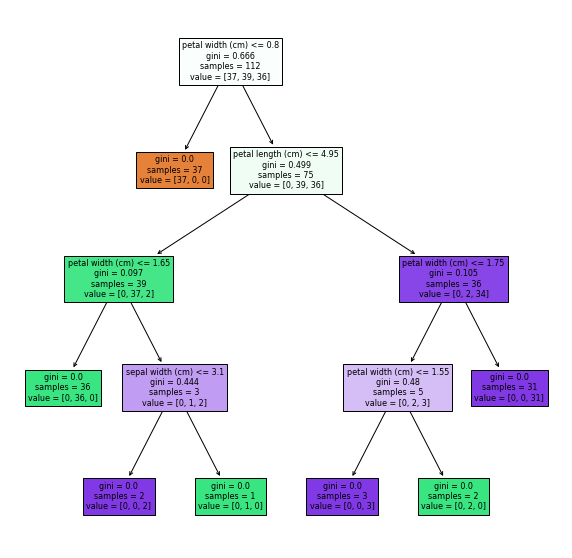

In [69]:
plt.figure(figsize = (10, 10))
plot_tree(dt, feature_names=iris['feature_names'], filled=True)

In [102]:
# 과대적합 : 너무 훈련데이터를 과하게 학습했을 때
# - 훈련데이터 정확도랑 시험 데이터 정확도가 크게 차이날 경우

# 과소적합 : 너무 훈련데이터를 적게 학습했을 때
# - 훈련데이터보다 시험데이터 정확도가 더 높게 나오는 경우
# - 훈련데이터, 시험데이터 정확도가 둘다 낮은 경우

fish2 = pd.read_csv("fish2.csv")

data = fish2.iloc[:, 1:].to_numpy()
target = fish2['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

In [112]:
dt = DecisionTreeClassifier(max_depth = 8) # 컴퓨터가 완벽하게 학습하지 못하도록
dt.fit(train_input, train_target)

# 10.6% / 5% / 3%
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9495798319327731
0.75


In [73]:
fish2

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


[Text(0.81875, 0.96875, 'Height <= 13.201\ngini = 0.786\nsamples = 119\nvalue = [23, 9, 43, 11, 18, 10, 5]'),
 Text(0.7854166666666667, 0.90625, 'Width <= 1.401\ngini = 0.744\nsamples = 99\nvalue = [3, 9, 43, 11, 18, 10, 5]'),
 Text(0.7520833333333333, 0.84375, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0]'),
 Text(0.81875, 0.84375, 'Length <= 44.5\ngini = 0.702\nsamples = 90\nvalue = [3, 9, 43, 11, 18, 1, 5]'),
 Text(0.7854166666666667, 0.78125, 'Weight <= 595.0\ngini = 0.665\nsamples = 83\nvalue = [3, 9, 43, 4, 18, 1, 5]'),
 Text(0.6375, 0.71875, 'Height <= 8.352\ngini = 0.721\nsamples = 68\nvalue = [3, 9, 29, 4, 18, 1, 4]'),
 Text(0.5083333333333333, 0.65625, 'Length <= 31.0\ngini = 0.617\nsamples = 52\nvalue = [0, 3, 28, 4, 15, 1, 1]'),
 Text(0.475, 0.59375, 'Width <= 4.136\ngini = 0.557\nsamples = 48\nvalue = [0, 3, 28, 0, 15, 1, 1]'),
 Text(0.38333333333333336, 0.53125, 'Height <= 6.457\ngini = 0.583\nsamples = 39\nvalue = [0, 3, 20, 0, 15, 1, 0]'),
 Text(0.3, 0.46875, 

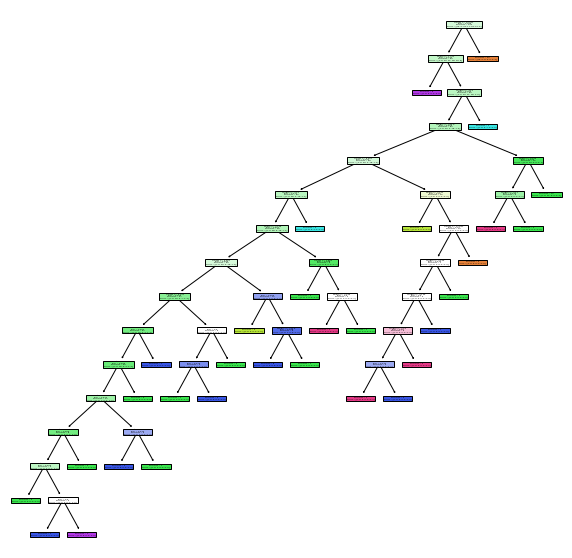

In [74]:
plt.figure(figsize = (10, 10))
plot_tree(dt, feature_names=["Weight", "Length", "Diagonal", "Height", "Width"], filled=True)

In [115]:
# 랜덤 포레스트 > 결정 트리
# 랜덤(시작점, 특성개수) 결정트리가 100개
# 특성개수 // 선택받지못한 데이터 -> 평가 / 데이터분할X
# 과대적합 잘 막아주는 편

# 여러 개의 머신러닝 모델을 결합
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
data, target = iris['data'], iris['target']

rf = RandomForestClassifier(oob_score=True) # oob_score : 선택못받은데이터로 평가
rf.fit(data, target)

RandomForestClassifier(oob_score=True)

In [116]:
rf.oob_score_

0.9533333333333334

In [121]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from tqdm import tqdm

# 1페이지부터 마지막페이지까지 모든 페이지 표를 가져오는 코드를 작성해보세요.
dic = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_2)"}

total = []
for n in tqdm(range(1, 669)):
    url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(n), headers=dic)
    html = BeautifulSoup(url.text)
    table = html.find("table")
    table = pd.read_html(str(table))[0].dropna()
    total.append(table)
    time.sleep(0.7)

100%|██████████| 668/668 [14:17<00:00,  1.28s/it]


In [122]:
len(total)

668

In [139]:
samsung = pd.concat(total, ignore_index = True)
samsung = samsung.drop(0)
samsung['날짜'] = pd.to_datetime(samsung['날짜'], format = "%Y.%m.%d")
samsung = samsung.sort_values(by = '날짜')
samsung = samsung.reset_index(drop=True)
del samsung['전일비']
samsung

,날짜,종가,시가,고가,저가,거래량
0,1996-06-25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6670,2023-01-20,61800.0,62100.0,62300.0,61100.0,9646327.0
6671,2023-01-25,63400.0,63500.0,63700.0,63000.0,16822710.0
6672,2023-01-26,63900.0,63800.0,63900.0,63300.0,13278277.0
6673,2023-01-27,64600.0,64400.0,65000.0,63900.0,18760182.0


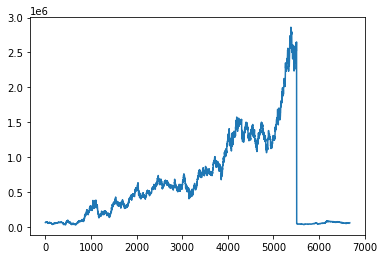

In [134]:
import matplotlib.pyplot as plt

plt.plot(samsung['종가'])

In [143]:
# 과거~2021년 -> 훈련
# 2022년 -> 시험

train = samsung[samsung['날짜'].dt.year <= 2021]
test = samsung[samsung['날짜'].dt.year > 2021]

train_input = []
train_target = []

test_input = []
test_target = []

for i in range(len(train) - 1):
    a = list(train.iloc[i, 1:])
    b = train.iloc[i+1, 1]
    train_input.append(a)
    train_target.append(b)

for i in range(len(test) - 1):
    a = list(test.iloc[i, 1:])
    b = test.iloc[i+1, 1]
    test_input.append(a)
    test_target.append(b)

In [144]:
import numpy as np

train_input = np.array(train_input)
train_target = np.array(train_target)

test_input = np.array(test_input)
test_target = np.array(test_target)

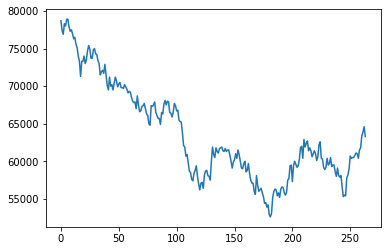

In [145]:
plt.plot(test_target)

In [146]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_input, train_target)

RandomForestRegressor()

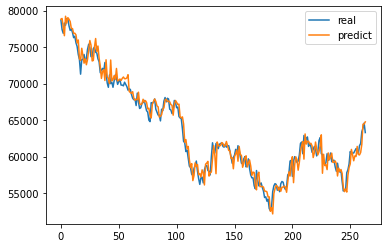

In [147]:
plt.plot(test_target)
plt.plot(rf.predict(test_input))
plt.legend(['real', 'predict'])

In [157]:
# 1월 30일 예측하라고하면 1월 31일 종가
# 600만개

# 600만개 + (KNN, LogisR, RF) // 3개의 모델이 모두 2% 이상 오른다라고 예측한 주식만 구매 // 2% 이상 오르면 바로 팔

a = np.array(samsung.iloc[-1, 1:].astype("float"))
rf.predict([a])

array([64213.])

In [169]:
# 실제 케글

# 95% 금메달 상위 3%

# 자전거 수요 예측 문제
bike = pd.read_csv("bike.csv")

del bike['casual']
del bike['registered']

# 문제집, 정답지를 정한 후, count를 예측하는 모델을 만들어보세요. (회귀)
bike['datetime'] = pd.to_datetime(bike['datetime'])

bike["year"] = bike['datetime'].dt.year
bike["month"] = bike['datetime'].dt.month
bike["day"] = bike['datetime'].dt.day
bike["hour"] = bike['datetime'].dt.hour

del bike['datetime']

bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [172]:
import calendar

box = []
for y, m, d in zip(bike['year'], bike['month'], bike['day']):
    w = calendar.weekday(y, m, d)
    box.append(w)

bike['weekday'] = box
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,2


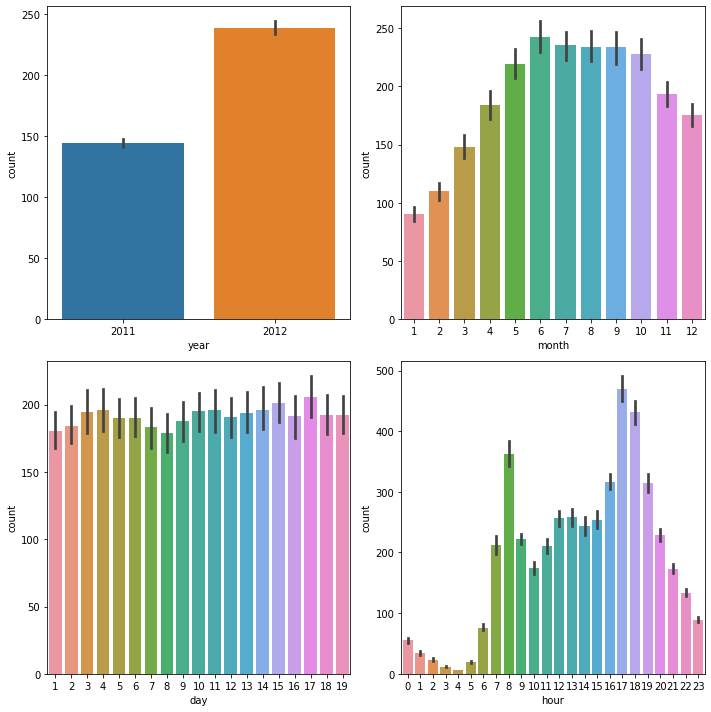

In [174]:
import seaborn as sns

fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.barplot(x='year', y='count', data=bike, ax=ax1)
sns.barplot(x='month', y='count', data=bike, ax=ax2)
sns.barplot(x='day', y='count', data=bike, ax=ax3)
sns.barplot(x='hour', y='count', data=bike, ax=ax4)

plt.tight_layout()

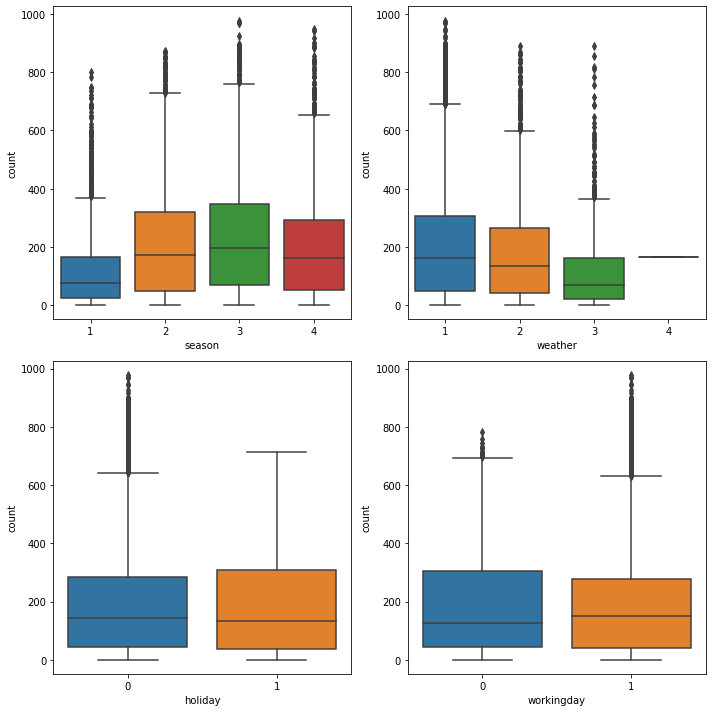

In [175]:
fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.boxplot(x='season', y='count', data=bike, ax=ax1)
sns.boxplot(x='weather', y='count', data=bike, ax=ax2)
sns.boxplot(x='holiday', y='count', data=bike, ax=ax3)
sns.boxplot(x='workingday', y='count', data=bike, ax=ax4)

fig.tight_layout()

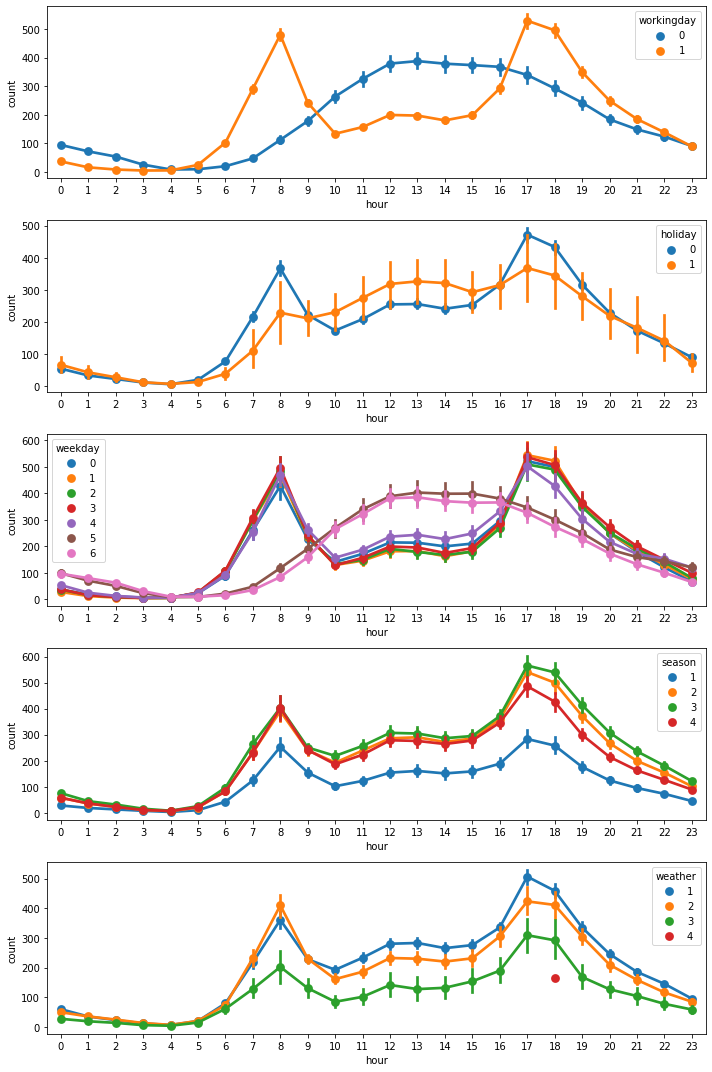

In [177]:
fig = plt.figure(figsize = (10, 15))

ax1 = fig.add_subplot(5, 1, 1)
ax2 = fig.add_subplot(5, 1, 2)
ax3 = fig.add_subplot(5, 1, 3)
ax4 = fig.add_subplot(5, 1, 4)
ax5 = fig.add_subplot(5, 1, 5)

sns.pointplot(x='hour', y='count', data=bike, ax=ax1, hue = 'workingday')
sns.pointplot(x='hour', y='count', data=bike, ax=ax2, hue = 'holiday')
sns.pointplot(x='hour', y='count', data=bike, ax=ax3, hue = 'weekday')
sns.pointplot(x='hour', y='count', data=bike, ax=ax4, hue = 'season')
sns.pointplot(x='hour', y='count', data=bike, ax=ax5, hue = 'weather')

fig.tight_layout()

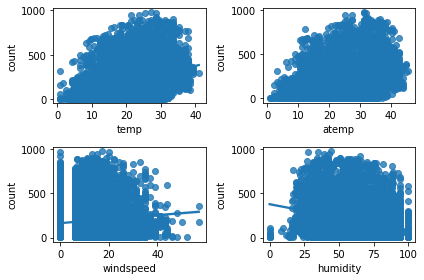

In [179]:
# 날씨가 4인것은 제외

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.regplot(x='temp', y='count', data=bike, ax=ax1)
sns.regplot(x='atemp', y='count', data=bike, ax=ax2)
sns.regplot(x='windspeed', y='count', data=bike, ax=ax3)
sns.regplot(x='humidity', y='count', data=bike, ax=ax4)

fig.tight_layout()

In [180]:
# 풍속없애고, 그래도 안좋으면 습도도 없애보기

del bike['windspeed']
bike

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,129,2012,12,19,22,2


In [181]:
bike = bike[bike['weather'] != 4]
bike

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,129,2012,12,19,22,2


In [183]:
data = bike.loc[:, bike.columns != 'count'].to_numpy()
target = bike['count'].to_numpy()

rf = RandomForestRegressor(oob_score=True)
rf.fit(data, target)
rf.oob_score_

0.9532915312191853